## **Academic Performance Analysis Based on Study Habits**

This notebook explores the relationship between various variables (such as sleep, social media, part-time work, etc.)
and students' academic performance based on a dataset from Kaggle.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import f
from scipy.stats import t


df = pd.read_csv("../Data/student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


### Data Cleaning and Preprocessing

In [ ]:
# Converting categorical variables to numerical

categorical = ["gender", "part_time_job","diet_quality",
               "parental_education_level", "internet_quality",
               "extracurricular_participation"]   

df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)
bools = df_encoded.select_dtypes(include="bool").columns
df_encoded[bools] = df_encoded[bools].astype(int)
df_encoded 

# Checking for missing data

missing = df_encoded.isnull().sum()
#print(missing) # No missing data 

df_encoded



,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,S1000,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,0,0,0,0,0,0,1,0,0,1
1,S1001,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,0,0,0,1,0,1,0,0,0,0
2,S1002,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,1,0,0,0,1,1,0,0,1,0
3,S1003,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,0,0,0,1,0,1,1,0,1
4,S1004,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,0,0,0,0,0,1,0,1,0,1
996,S1996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,0,1,0,1,1,0,0,0,1
997,S1997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,1,0,0,1,0,0,0,1,0,1
998,S1998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1,0,1,0,0,0,0,0,0,0


### Exploration Analysis


**Part 1: Does Having a Part-Time Job Affect a Student's Academic Performance?**

No Part time job: W=0.986, p-value=0.000
Part time job: W=0.985, p-value=0.019


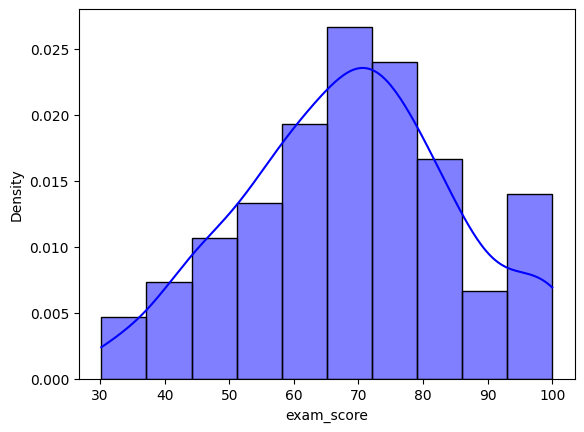

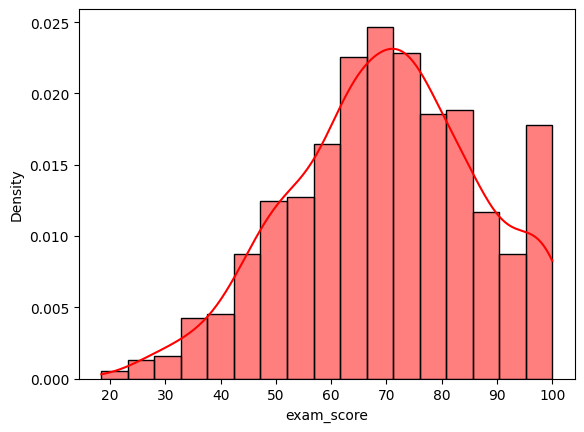

In [ ]:
# We categorize each student's grade based on whether they have a part-time job or not
# This allows us to compare the academic performance between students who work part-time and those who do not

score_part_job = df_encoded[df_encoded["part_time_job_Yes"] == 1]["exam_score"]
score_no_part_job = df_encoded[df_encoded["part_time_job_Yes"] == 0]["exam_score"]

# Identify the distribution of this two variables 
plt.figure()
sns.histplot(score_part_job, kde=True, color="blue", label="Part-time job", stat="density")
plt.figure()
sns.histplot(score_no_part_job, kde=True, color="red", label="No-Part-time job", stat="density")

stat1, p1 = shapiro(score_no_part_job) #Shapiro-Wilk test for alpha = 0.05
stat2, p2 = shapiro(score_part_job) # h0: its normal distriburtion, ha: its not normal distribution
print(f"No Part time job: W={stat1:.3f}, p-value={p1:.3f}") 
print(f"Part time job: W={stat2:.3f}, p-value={p2:.3f}") 

# The two variables are not normally distributed, but we will assume normality based on the Central Limit Theorem (CLT)
# We will also assume that the variables are independent

In [ ]:
# Lastly, we need to check whether the two variables have equal variances
# H0: σ1² = σ2² → θ = 0
# H1: σ1² ≠ σ2² → θ ≠ 0
# Significance level: α = 0.05

alpha = 0.05

def var_test(x, y, alpha):
    n1 = len(x)
    n2 = len(y)

    S21 = x.var(ddof=1)
    S22 = y.var(ddof=1)

    if S21 > S22:
        F_obs = S21/S22
        df1 = n1 - 1
        df2 = n2 - 2 
    elif S21 < S22:
        F_obs = S22/S21 
        df1 = n2 - 1
        df2 = n1 - 2
       
    f2 = f.ppf(1-alpha/2, df1, df2) 
    f1 = 1/(f.ppf(1-alpha/2, df2, df1))  
        
    if F_obs < f1 or F_obs > f2: 
        return "Reject H0: The variances are not equal"
    else:
        return "Fail to reject H0: The variances are equal"
    
var_test_result = var_test(score_no_part_job, score_part_job, alpha)
print(var_test_result)

Fail to reject H0: The variances are equal


In [ ]:
# Test to determine whether having a part-time job affects academic performance using the means
# H0: μ1 = μ2 (mean performance is the same regardless of part-time job)
# H1: μ1 ≠ μ2 (mean performance differs depending on part-time job)
# Significance level: α = 0.05
# We'll use an independent two-sample t-test (assuming normality and equal/unequal variances depending on prior test)


def ind_mean_varequal(x, y, alpha, bi):
    
    if bi == "bilateral":
        n1 = len(x)
        n2 = len(y)
        S21 = x.var(ddof=1)
        S22 = y.var(ddof=1)

        Xmean = x.mean()
        Ymean = y.mean()

        S2xy = ((n1 - 1)*S21 + (n2 - 1)*S22)/(n1 + n2 - 2)
        
        tc1 = t.ppf(alpha/2, n1 + n2 - 2)
        tc2 = t.ppf(1 - alpha/2, n1 + n2 - 2)
        
        T_obs = (Xmean - Ymean) / (np.sqrt(S2xy * (1/n1 + 1/n2)))
        if T_obs < tc1 or T_obs > tc2: 
            return f"Reject H0: T_obs = {T_obs:.3f}, tc1 = {tc1:.3f}, tc2 = {tc2:.3f}"
        else:
            return f"Fail to reject H0: T_obs = {T_obs:.3f}, tc1 = {tc1:.3f}, tc2 = {tc2:.3f}"
    
    elif bi == "left-tailed": 
        n1 = len(x)
        n2 = len(y)
        S21 = x.var(ddof=1)
        S22 = y.var(ddof=1)

        Xmean = x.mean()
        Ymean = y.mean()

        S2xy = ((n1 - 1)*S21 + (n2 - 1)*S22)/(n1 + n2 - 2)
        
        tc = t.ppf(1 - alpha, n1 + n2 - 2)
        
        T_obs = (Xmean - Ymean) / (np.sqrt(S2xy * (1/n1 + 1/n2)))
        if T_obs < tc: 
            return f"Reject H0: T_obs = {T_obs:.3f}, tc = {tc:.3f}"
        else:
            return f"Fail to reject H0: T_obs = {T_obs:.3f}, tc = {tc:.3f}"
    
    elif bi == "right-tailed": 
        n1 = len(x)
        n2 = len(y)
        S21 = x.var(ddof=1)
        S22 = y.var(ddof=1)

        Xmean = x.mean()
        Ymean = y.mean()

        S2xy = ((n1 - 1)*S21 + (n2 - 1)*S22)/(n1 + n2 - 2)
        
        tc = t.ppf(alpha, n1 + n2 - 2)
        
        T_obs = (Xmean - Ymean) / (np.sqrt(S2xy * (1/n1 + 1/n2)))
        if T_obs > tc: 
            return f"Reject H0: T_obs = {T_obs:.3f}, tc = {tc:.3f}"
        else:
            return f"Fail to reject H0: T_obs = {T_obs:.3f}, tc = {tc:.3f}"
        
alpha = 0.05
result = ind_mean_varequal(score_no_part_job, score_part_job, alpha, "bilateral")
print(result)
        
    

Fail to reject H0: T_obs = 0.841, tc1 = -1.962, tc2 = 1.962



**Part 2: Do People with Better Mental Health Perform Better Academically than Those Who Do Not?**

No Part time job: W=0.977, p-value=0.000
Part time job: W=0.993, p-value=0.023


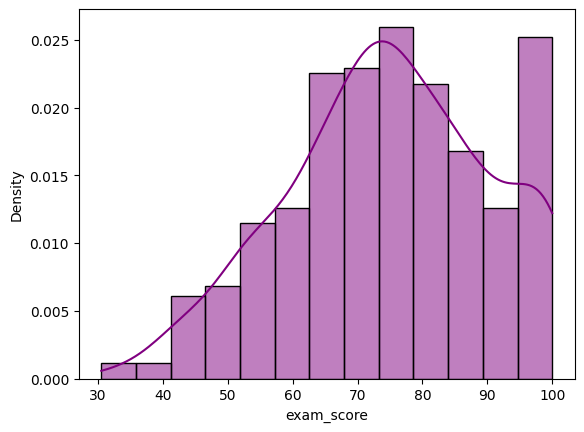

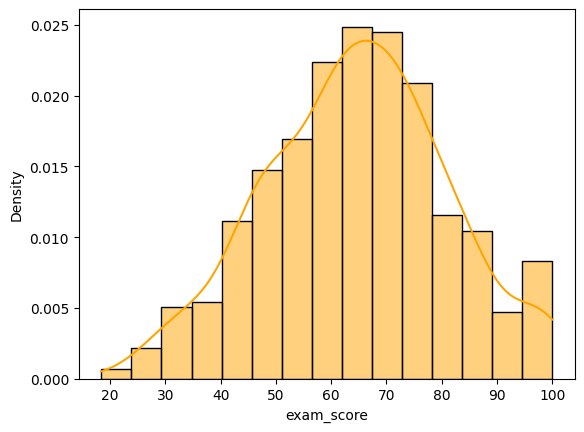

In [ ]:
# To do this, we will split the variable into two groups: one for students with good mental health and another for those without
# We will define "good mental health" as a mental health rating greater than 5, and "bad mental health" as a rating of 5 or less

def classify_health(mental):
    return "Bad" if mental <= 5 else "Good"

df_encoded["mental_health_status"] = df_encoded["mental_health_rating"].apply(classify_health)

good_mental = df_encoded[df_encoded["mental_health_status"] == "Good"]["exam_score"]
bad_mental= df_encoded[df_encoded["mental_health_status"] == "Bad"]["exam_score"]

#Identify the distribution of this two variables 
plt.figure()
sns.histplot(good_mental, kde=True, color="purple", label="Good Mental Health", stat="density")
plt.figure()
sns.histplot(bad_mental, kde=True, color="orange", label="Bad Mental Health", stat="density")

stat1, p1 = shapiro(good_mental) #Shapiro-Wilk test for alpha = 0.05
stat2, p2 = shapiro(bad_mental) # h0: its normal distriburtion, ha: its not normal distribution
print(f"No Part time job: W={stat1:.3f}, p-value={p1:.3f}") 
print(f"Part time job: W={stat2:.3f}, p-value={p2:.3f}") 

# The two variables are not normally distributed, but we will assume normality based on the Central Limit Theorem (CLT)
# We will also assume that the variables are independent

In [ ]:
# Since we are assuming the Central Limit Theorem (CLT) for the sample mean estimator of these two variables, 
# we need to know the variance of both variables
# As we don't know whether the variances are equal, we will perform a variance test first


alpha = 0.05
var_test_result2 = var_test(good_mental, bad_mental, alpha)
print(var_test_result2)

Fail to reject H0: The variances are equal


In [ ]:
# Now let's perform a test between the two means to determine whether mental health affects academic performance
# H0: μ_good = μ_bad
# H1: μ_good ≠ μ_bad
# Significance level: α = 0.05

result = ind_mean_varequal(good_mental, bad_mental, alpha, "bilateral")
print(result)

Reject H0: T_obs = 10.094, tc1 = -1.962, tc2 = 1.962


In [ ]:
# Let's construct a confidence interval to understand the difference between the two means

def ic(x, y, alpha):
    n1 = len(x)
    n2 = len(y)
    S21 = x.var(ddof=1)
    S22 = y.var(ddof=1)

    Xmean = x.mean()
    Ymean = y.mean()

    S2xy = ((n1 - 1)*S21 + (n2 - 1)*S22)/(n1 + n2 - 2)

    t_crit = t.ppf(1 - alpha/2, n1 + n2 - 2)
    
    margin_error = t_crit * np.sqrt(S2xy * (1/n1 + 1/n2))
    
    lower_bound = (Xmean - Ymean) - margin_error
    upper_bound = (Xmean - Ymean) + margin_error
    
    return lower_bound, upper_bound

ic_result = ic(good_mental, bad_mental, alpha)
print(f"IC for the difference between means: ({ic_result[0]:.3f}, {ic_result[1]:.3f})")

IC for the difference between means: (8.279, 12.275)


**Part 3 - Bootstrap: Let's now study the correlation between the variable "hours on social media" and academic performance.**

We want to understand whether, and to what extent, the first variable impacts the second. We will do this by:<br>
1. Calculating the sample correlation<br>
2. Building a confidence interval to estimate the population correlation using bootstrap<br>



In [ ]:
#1. Correlation between the two variables

social_hours = df_encoded["social_media_hours"]
exam_score = df_encoded["exam_score"]

corr = social_hours.corr(exam_score)
print(f"Correlation between social media hours and exam score: {corr:.3f}")

#2. Confidence Interval using Bootstrap

def bootstrap_correlation(x, y, b_iterations, alpha):
    corre_values = []
    n = len(x)
    
        # We must resample x and y as a single sample from the same student — only this way does the correlation make sense
        # In other words, if a student has 5 hours of social media usage, they should still have 5 hours in the resampled data,
        # and their grade should remain the same in the resampled data
        # Therefore, we will resample the indices of x and y together
        # This ensures that the resampled data maintains the relationship between the two variables

    
    for _ in range(b_iterations):
        indices = np.random.choice(range(n), size=n, replace=True)
        # We are selecting the same random observations for both x and y using the indices
        x_sample = x.iloc[indices]
        y_sample = y.iloc[indices]
        
        corr = x_sample.corr(y_sample)
        corre_values.append(corr)
    
    corre_std = np.std(corre_values)
    lower_bound = np.percentile(corre_values, 100 * alpha / 2)
    upper_bound = np.percentile(corre_values, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound, corre_std

b_iterations = 10000
alpha = 0.05
ic_correlation = bootstrap_correlation(social_hours, exam_score, b_iterations, alpha)
print(f"IC for the correlation: ({ic_correlation[0]:.3f}, {ic_correlation[1]:.3f}) with {1-alpha}, Standard Deviation: {ic_correlation[2]:.3f}")
    


Correlation between social media hours and exam score: -0.167
IC for the correlation: (-0.225, -0.109) with 0.95, Standard Deviation: 0.030


**Part 3.2 - let's create a heatmap to visualize the sample correlation between academic performance and other variables**


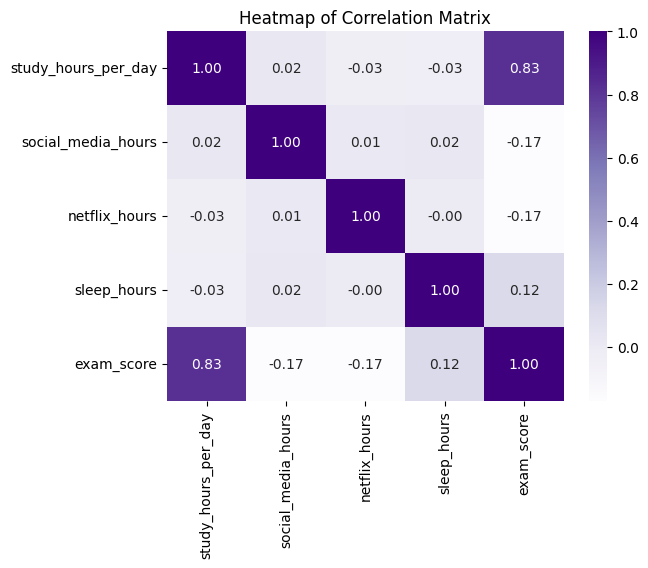

In [ ]:

subset = df_encoded[["study_hours_per_day","social_media_hours", "netflix_hours", "sleep_hours","exam_score"]]
corr_matrix = subset.corr()     

sns.heatmap(corr_matrix, annot=True, cmap="Purples", fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [ ]:
# We noticed that study hours have a very strong sample correlation with academic performance
# Let's do the same analysis we did with the social media time variable, but now using study hours

study_hours = df_encoded["study_hours_per_day"]

ic_correlation2 = bootstrap_correlation(study_hours, exam_score, b_iterations, alpha)
print(f"IC for the correlation: ({ic_correlation2[0]:.3f}, {ic_correlation2[1]:.3f}) with {1-alpha}, Standard Deviation: {ic_correlation2[2]:.3f}")


IC for the correlation: (0.806, 0.843) with 0.95, Standard Deviation: 0.009
